In [1]:
# needed functions and libraries
import pandas as pd
import seaborn as sns
from pathlib import Path
import signature_functions as sf

# inputs

In [2]:
config_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_CJ_batch114/configs.json'
configs = sf.config_reader(config_path)
report_dir = configs['results_folder']
meta_file_path = configs['metadata_annotation']
meta_df = pd.read_excel(meta_file_path)
sf.entity_subtypes = 'code_oncotree'
path_to_file = f'{report_dir}/basket_scores_4th_gen.tsv'

# signature by t_test
intensity_file = pd.read_csv(path_to_file,sep = '\t').set_index('Sample').transpose()


In [3]:

input_df,list_proteins = sf.prepareDataframeforTest(
                                                    intensity_file,
                                                    meta=meta_df,
                                                    minimum_patients_per_entity = 8,
                                                    protein_expressed_in_at_least_percent = 70)



In [4]:
params = sf.hyper_parameters_tuning_by_CV_one_vs_all_SVM(input_df,
                                                list_proteins,
                                                'ARMS')

/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

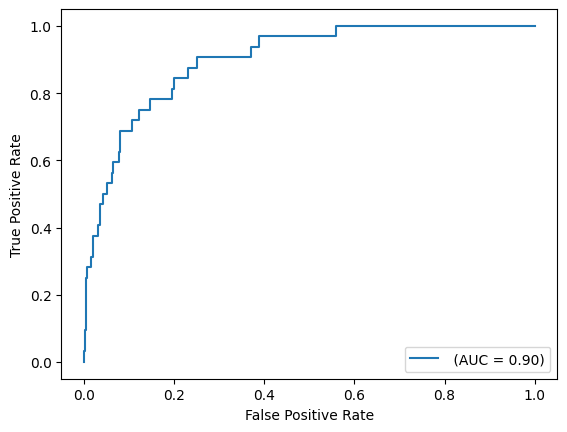

In [6]:
res =  sf.SVM_cross_validaition_with_t_test_Feature_selection(input_df,
                                                        intensity_file,
                                                        meta_df,
                                                        list_proteins,
                                                        Entity = 'ARMS',
                                                        p_value_cutoff = None,
                                                        fdr_cutoff = .01,  # for t_test as the feature selecetor
                                                        average_difference_twogroups = .75,  # the difference between the two groups
                                                        n_splits = 5,
                                                        n_repeats = 1,
                                                        weight_multiplier = -1
                                                        )

T_test Cross_validaton

T_test Cross_validaton

/home/amir/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])

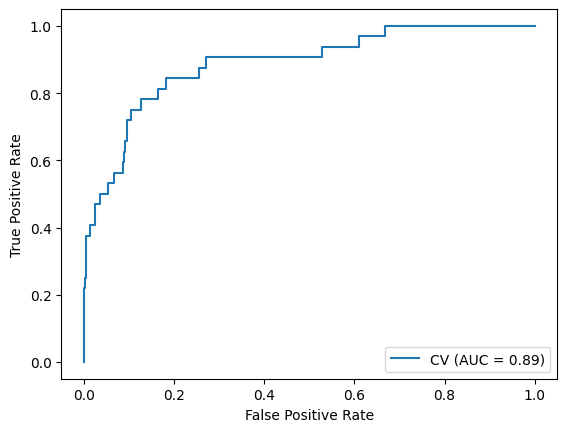

0.8872319034852547

In [9]:
CV_reseults = sf.cross_validation_for_one_vs_all_t_test(
                                         input_df,
                                         intensity_file,
                                         meta_df,
                                         'ARMS',
                                         list_proteins,
                                         k_folds = 5,
                                         num_repeats = 1,
                                         p_value_cutoff = None,
                                         fdr_cutoff = .01,
                                         average_difference_twogroups = .5)
sf.ROC_curve_analysis(CV_reseults.labels,CV_reseults.scores,curve_title='CV') 